In [1]:
import gym
import tensorflow as tf
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from rl_utils import load_policy

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

In [6]:
env, pi = load_policy('roboschool-cheetah')
frames = []

obs = env.reset()
# print(obs.shape)
for i in range(100):
    a = pi.act(obs)
    obs, r, done, _ = env.step(a)
    frames.append(env.render(mode = 'rgb_array'))

loaded :3
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
~INF~ [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan  0.  0.  0.  0.  0.  0.]


/home/Tiberio/roboschool/roboschool/gym_forward_walker.py:50: RuntimeWarning: invalid value encountered in greater
  self.joints_at_limit = np.count_nonzero(np.abs(j[0::2]) > 0.99)


AssertionError: 


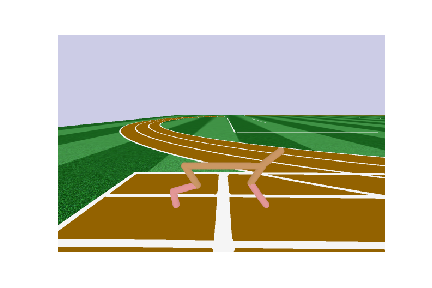
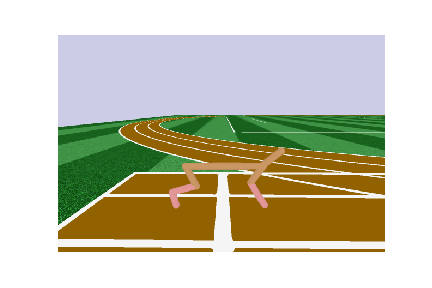
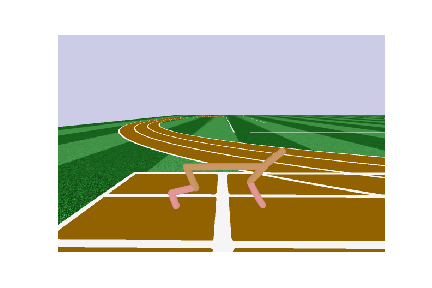
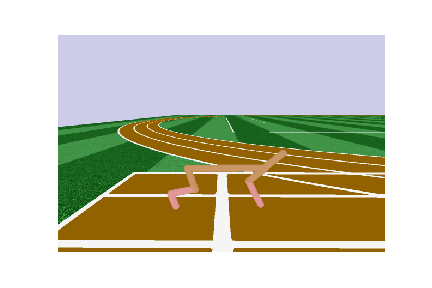
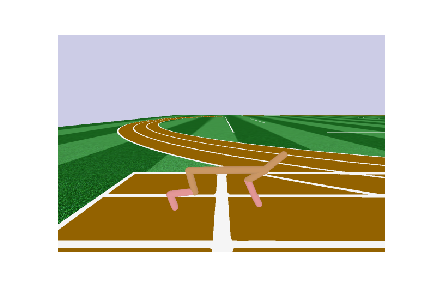
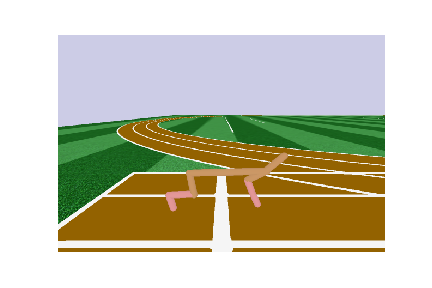
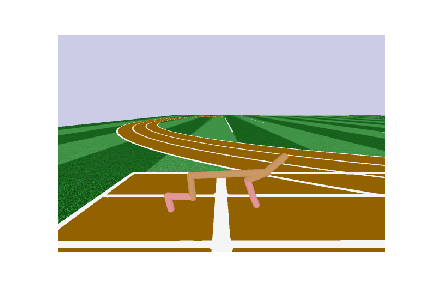
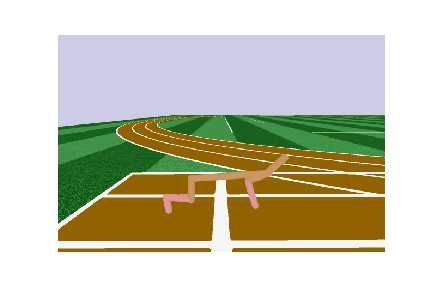
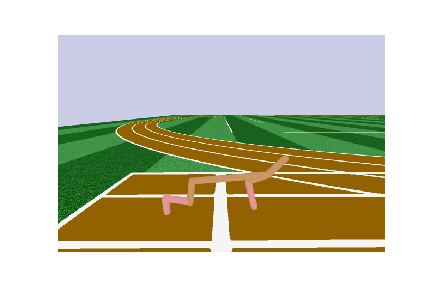
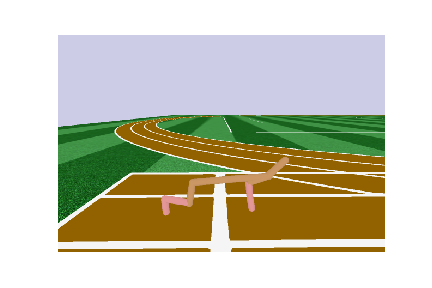
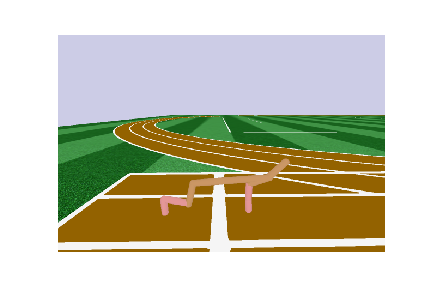
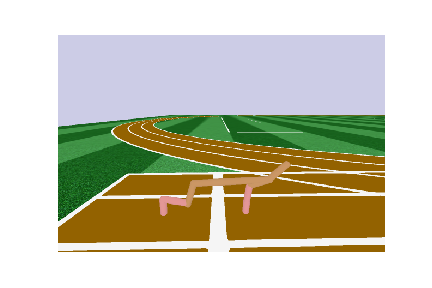
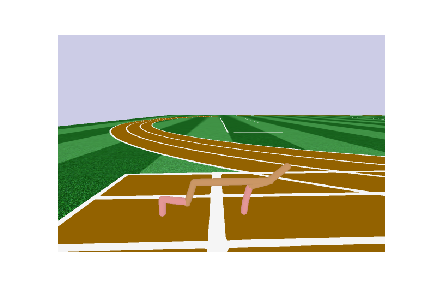
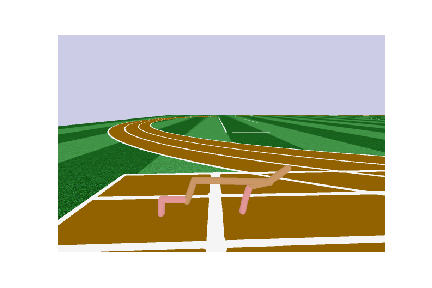
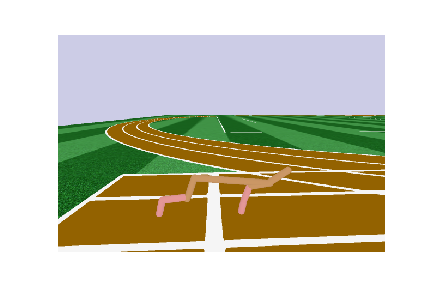
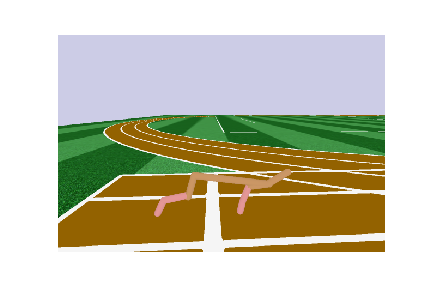
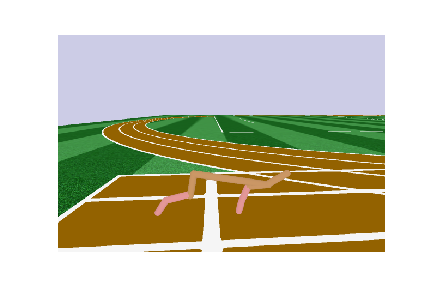
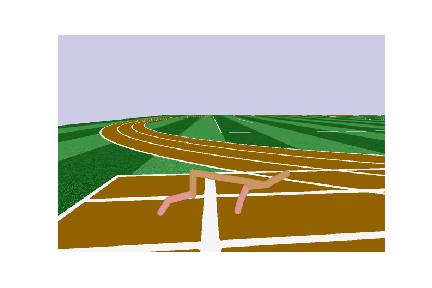
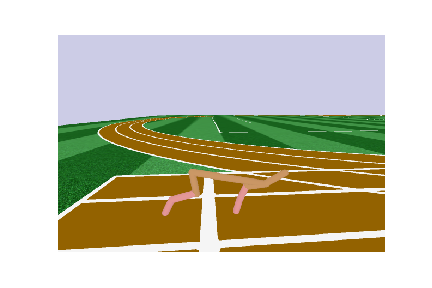
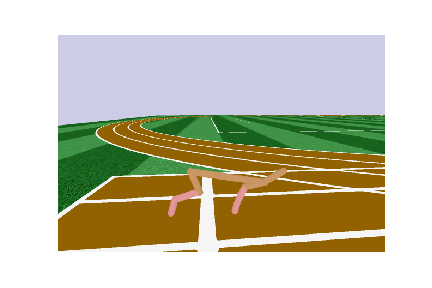
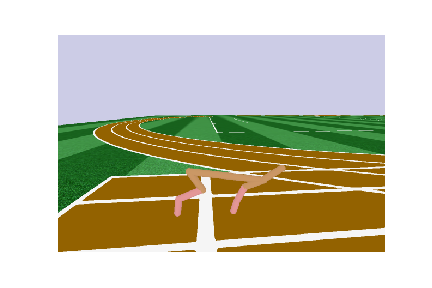
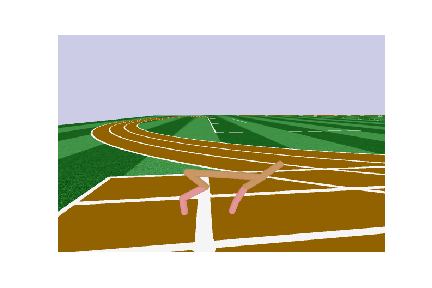
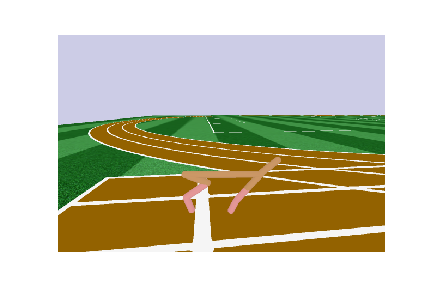
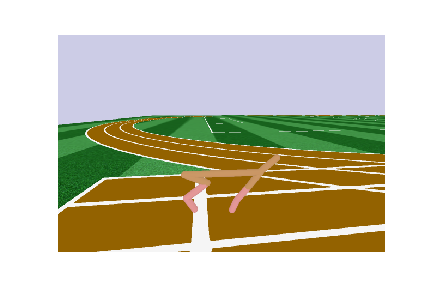
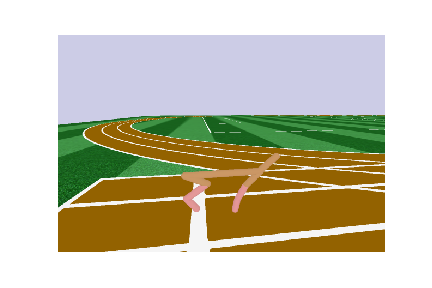
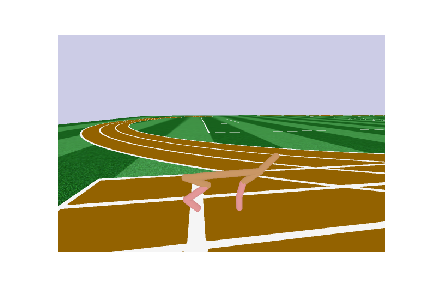
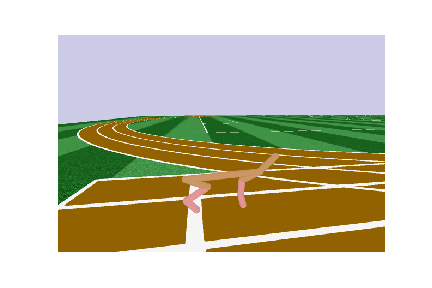
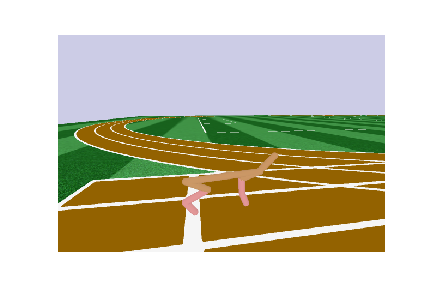
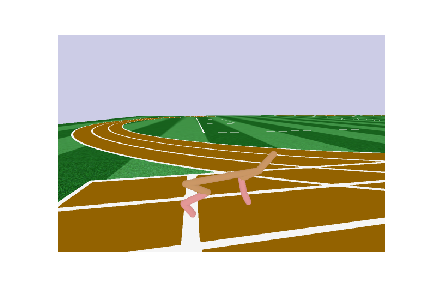
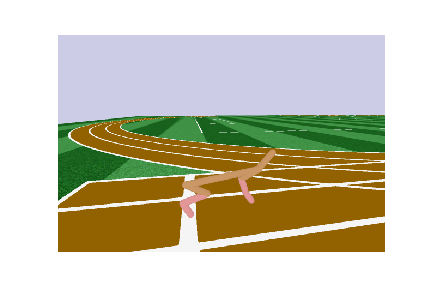
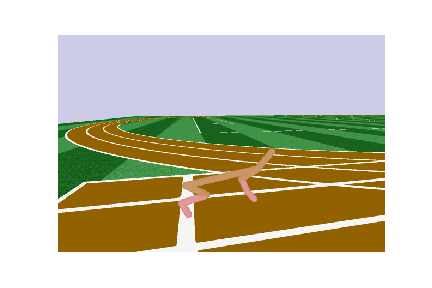
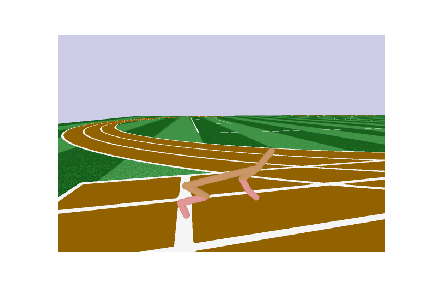
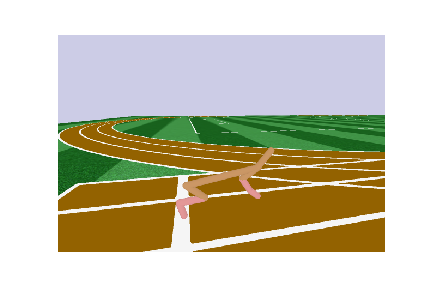
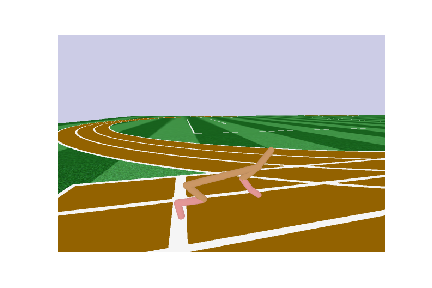
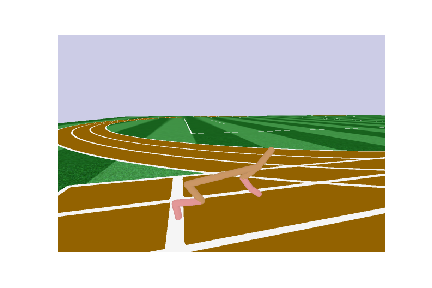
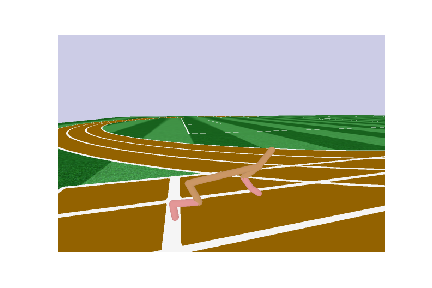
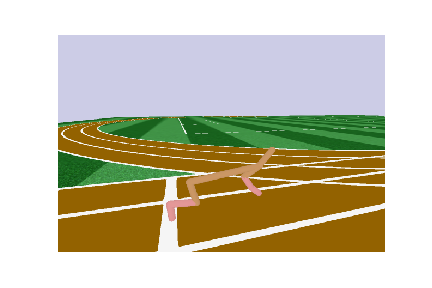
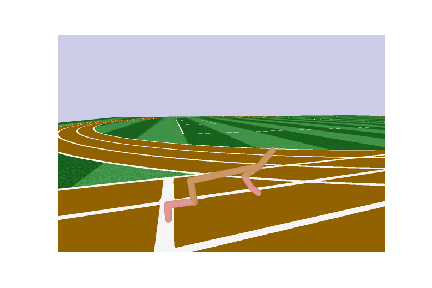
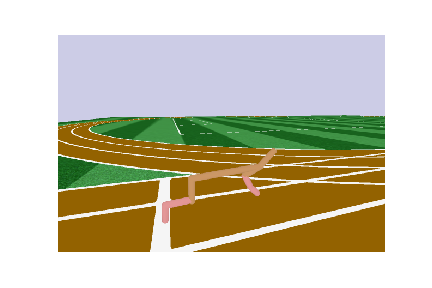
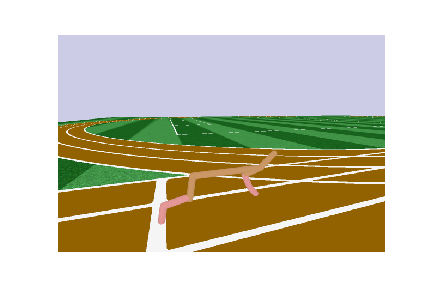
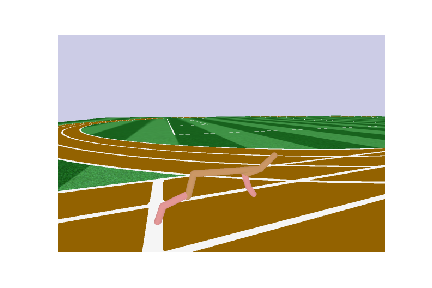
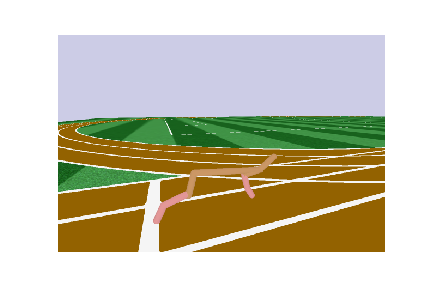
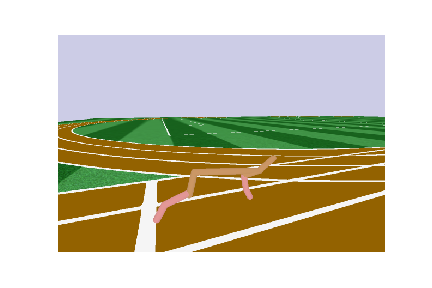
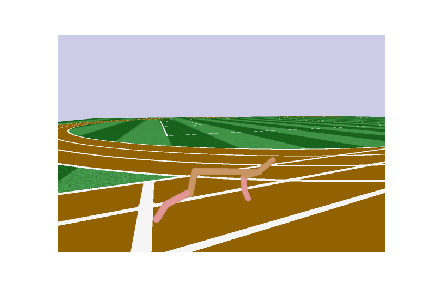
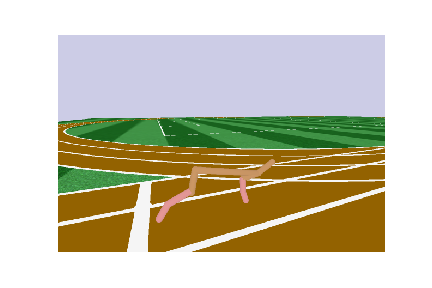
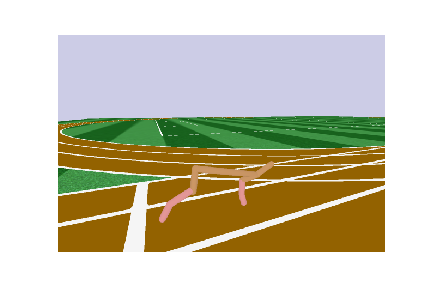
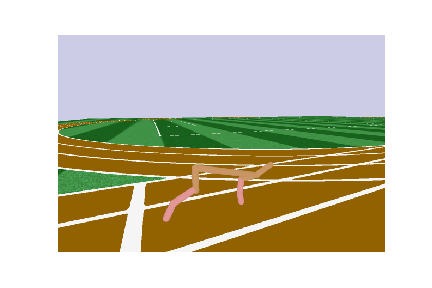
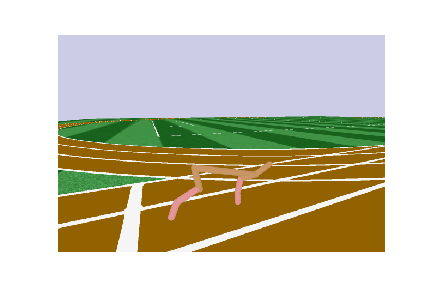
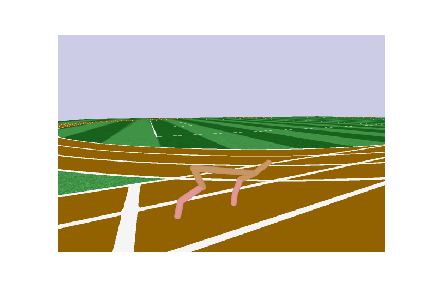
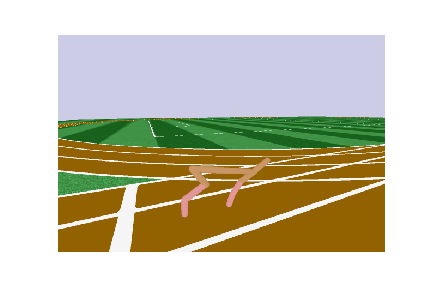
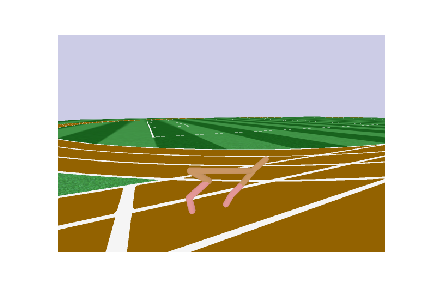
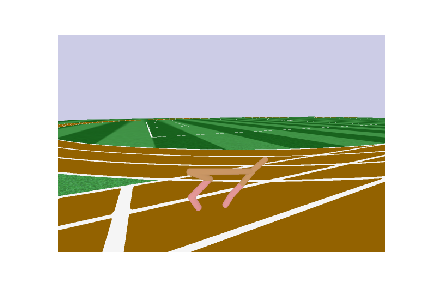
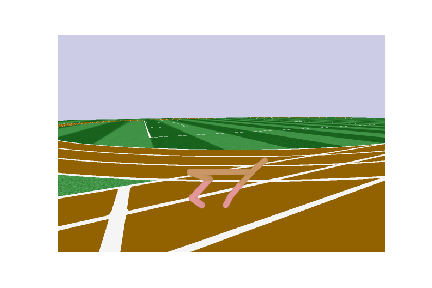
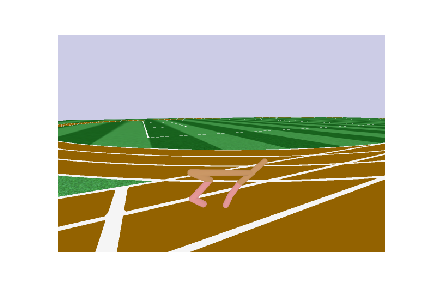
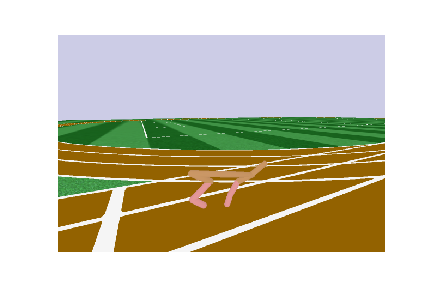
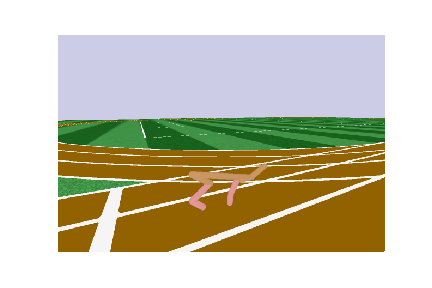
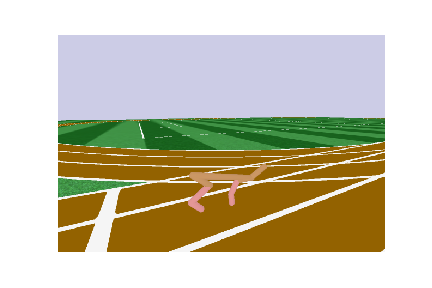
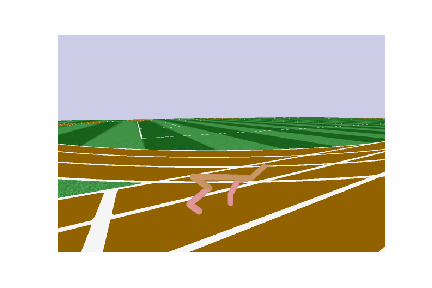
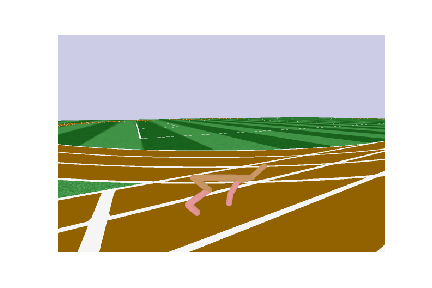
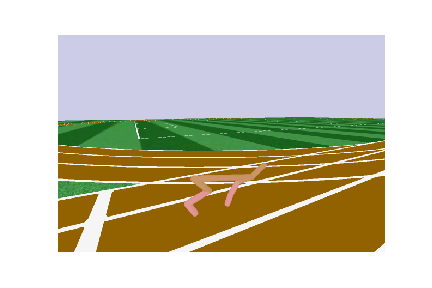
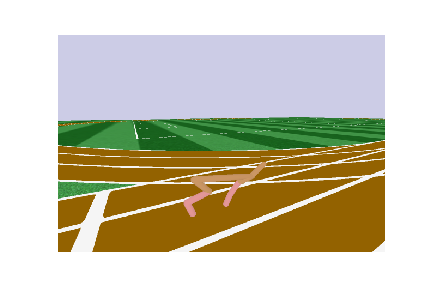
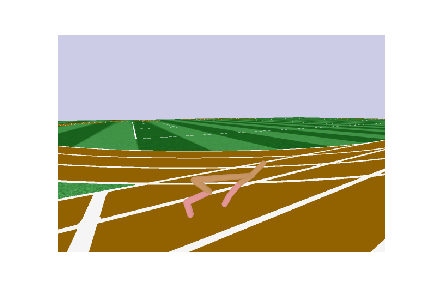
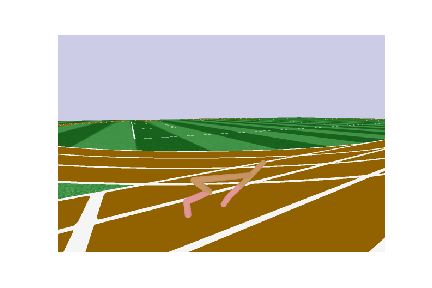
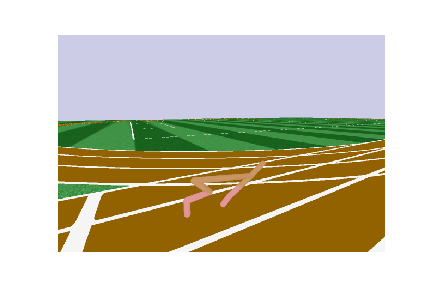
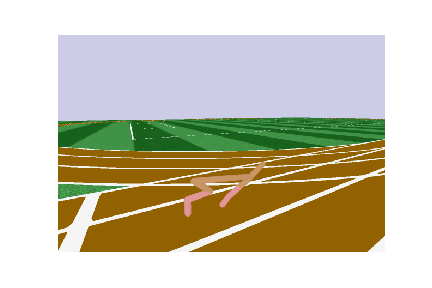
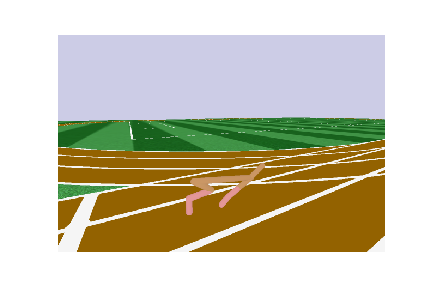
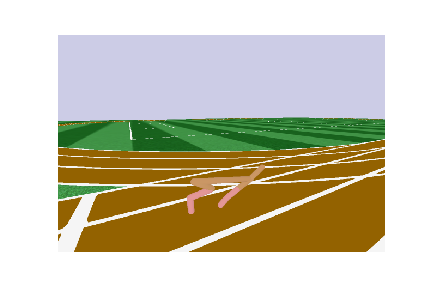
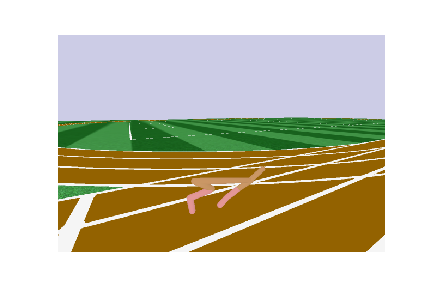
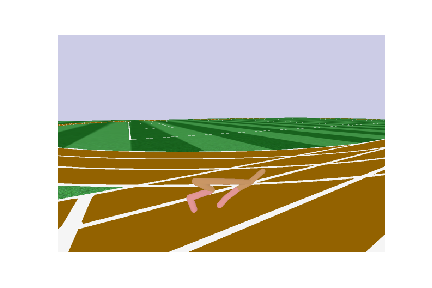
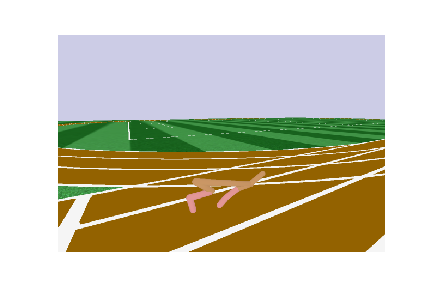
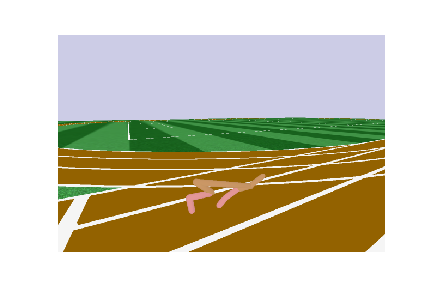
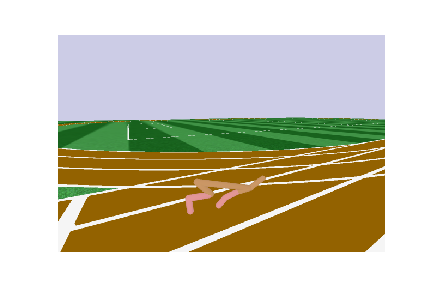
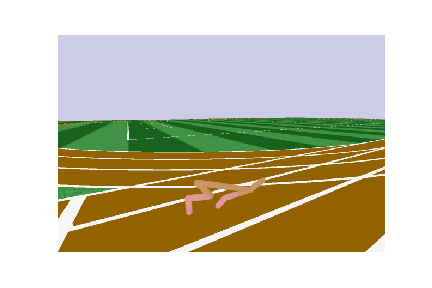
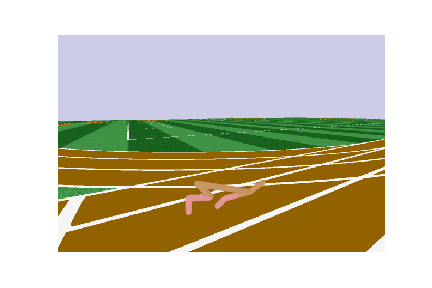
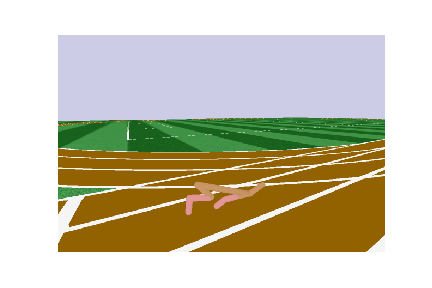
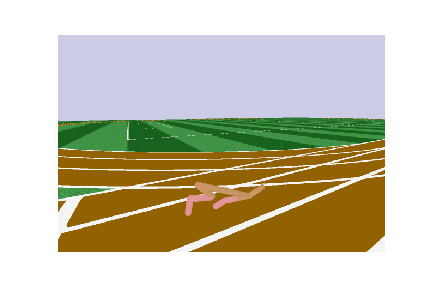
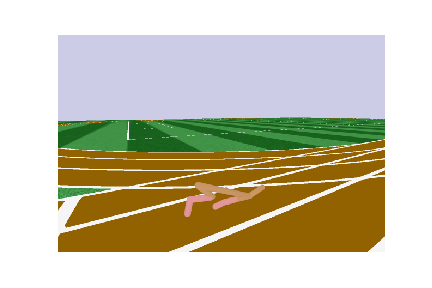
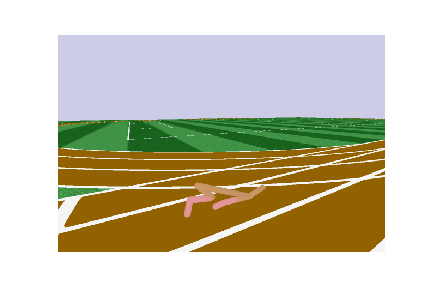
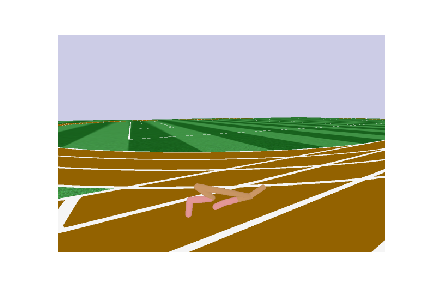
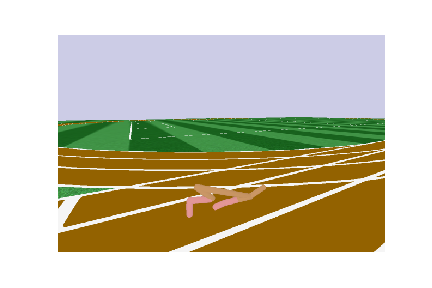
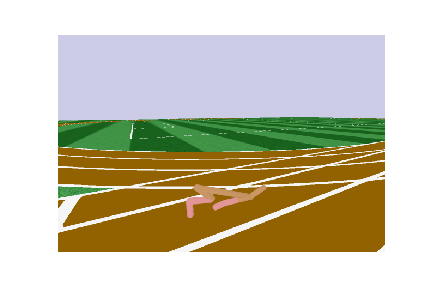
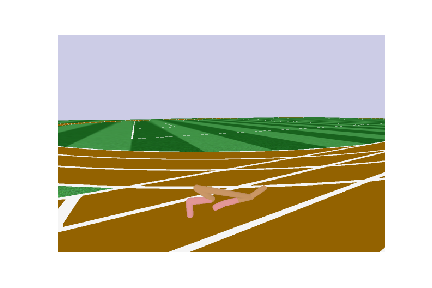
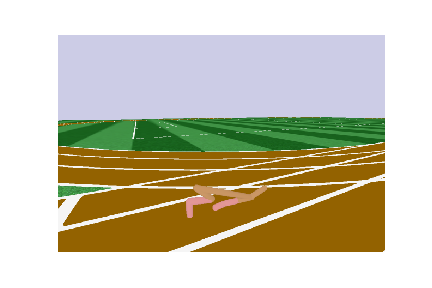
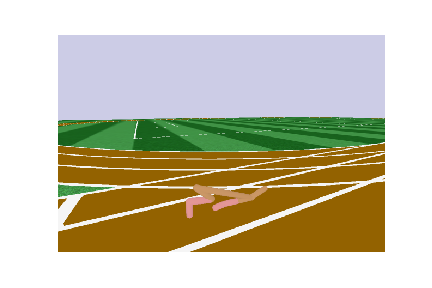
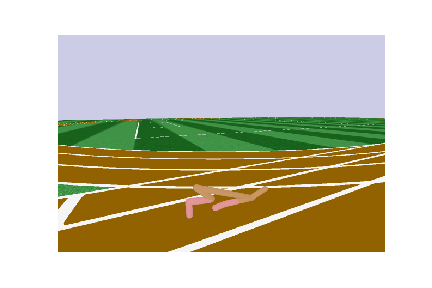
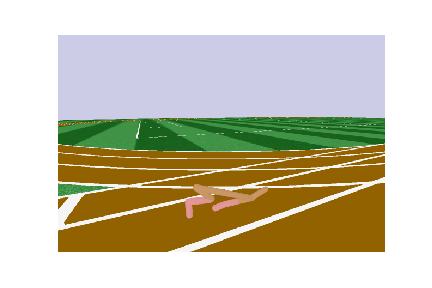
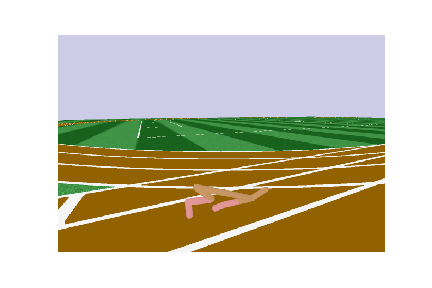
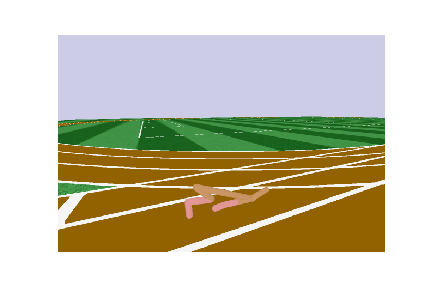
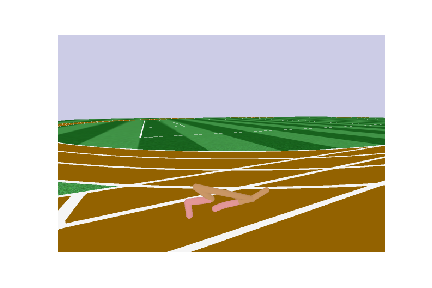
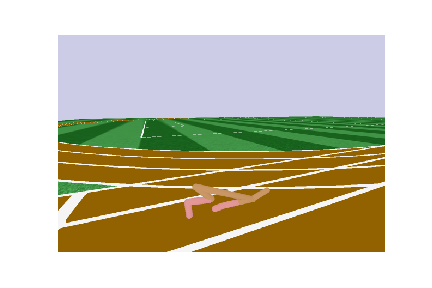
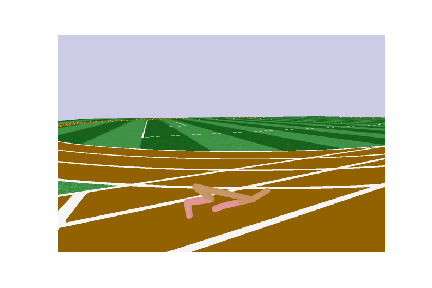
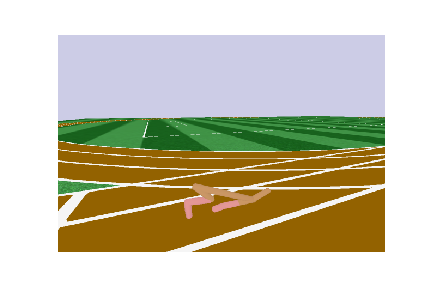
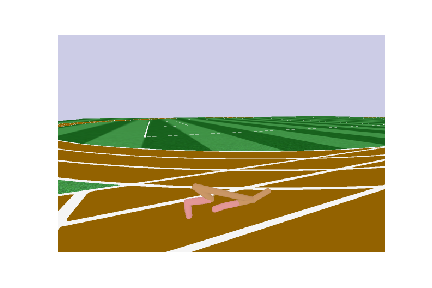
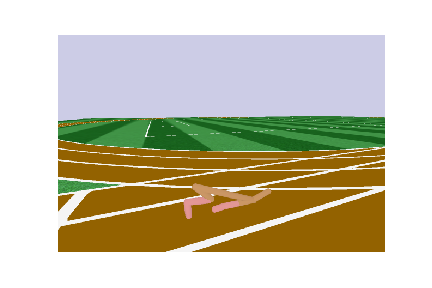
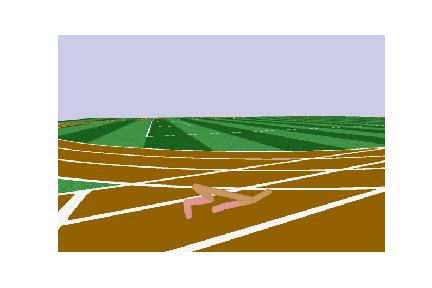
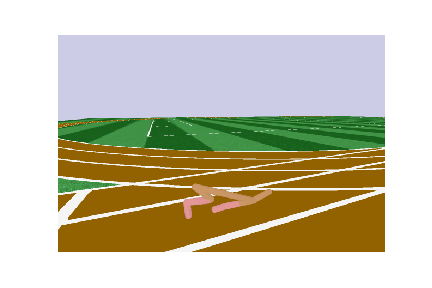
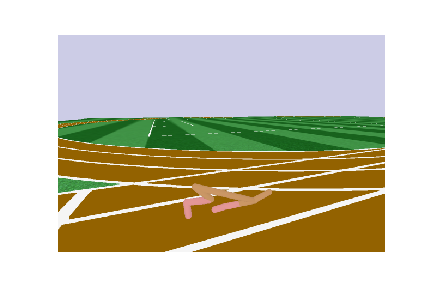
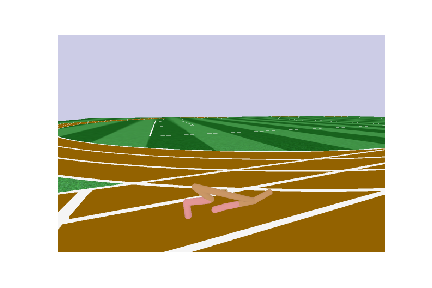
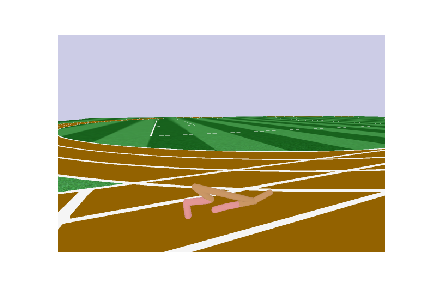
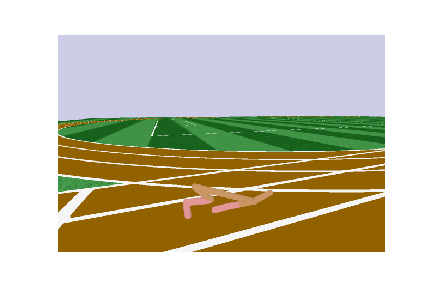

In [5]:
# Testing
display_frames_as_gif(frames)